In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'pandas'

In [ ]:
books = pd.read_csv('books.csv')
users = pd.read_csv('users.csv')
ratings = pd.read_csv('ratings.csv')

C:\Users\shiva\AppData\Local\Temp\ipykernel_24972\3819754567.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('books.csv')


In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [ ]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [ ]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

## EDA


In [ ]:
# Import necessary libraries
import seaborn as sns

# Display basic information
print("Users Dataset Info:")
print(users.info())
print("\nBooks Dataset Info:")
print(books.info())
print("\nRatings Dataset Info:")
print(ratings.info())

# Check for missing values
print("\nMissing Values in Users:")
print(users.isnull().sum())
print("\nMissing Values in Books:")
print(books.isnull().sum())
print("\nMissing Values in Ratings:")
print(ratings.isnull().sum())

# Handle missing values
# Filling missing 'Age' in users with median
users['Age'] = users['Age'].fillna(users['Age'].median())

# Filling missing 'Book-Author' and 'Publisher' in books with 'Unknown'
books['Book-Author'] = books['Book-Author'].fillna('Unknown')
books['Publisher'] = books['Publisher'].fillna('Unknown')



# Check for duplicates
print("\nChecking for Duplicates:")
print(f"Users Duplicates: {users.duplicated().sum()}")
print(f"Books Duplicates: {books.duplicated().sum()}")
print(f"Ratings Duplicates: {ratings.duplicated().sum()}")

# Summary statistics
print("\nUsers Age Summary Statistics:")
print(users['Age'].describe())

print("\nYear of Publication Summary Statistics:")
print(books['Year-Of-Publication'].describe())

print("\nBook Ratings Summary Statistics:")
print(ratings['Book-Rating'].describe())





Users Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
None

Books Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L      

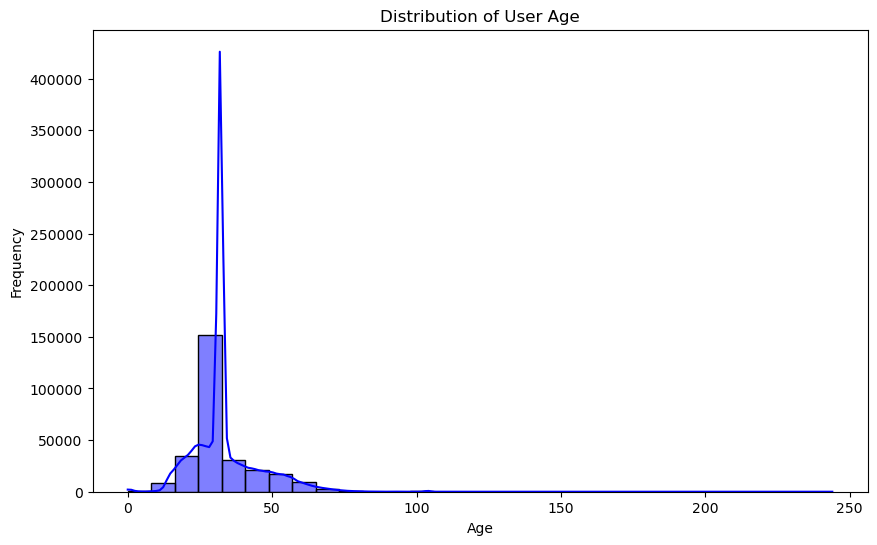

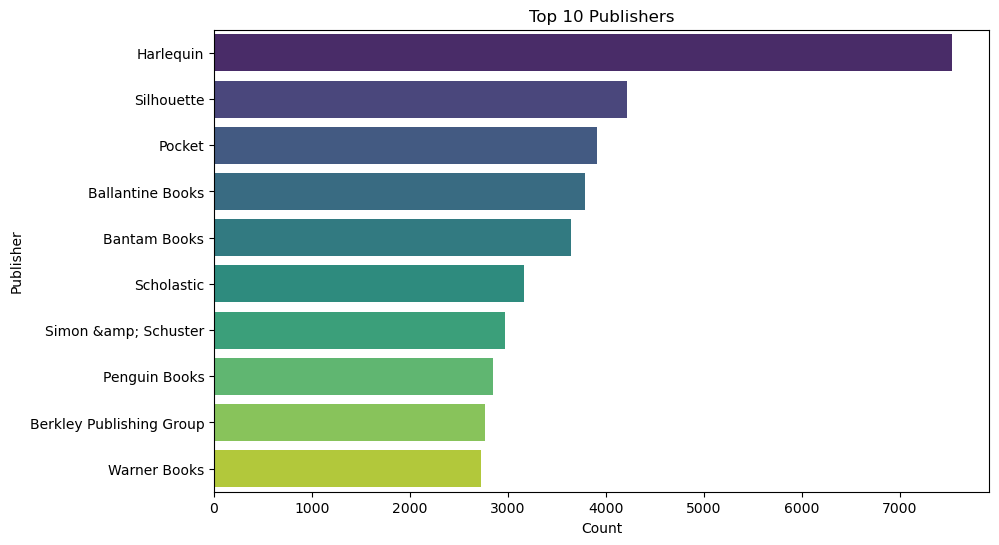

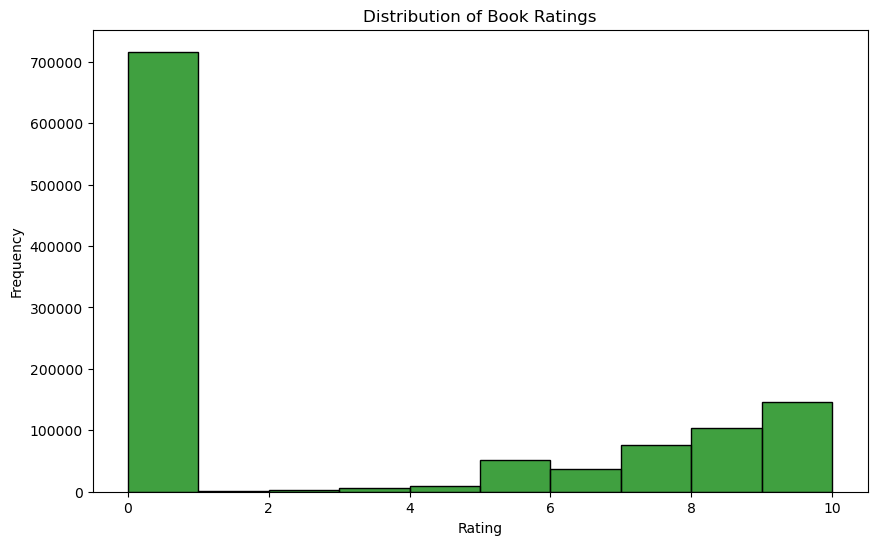

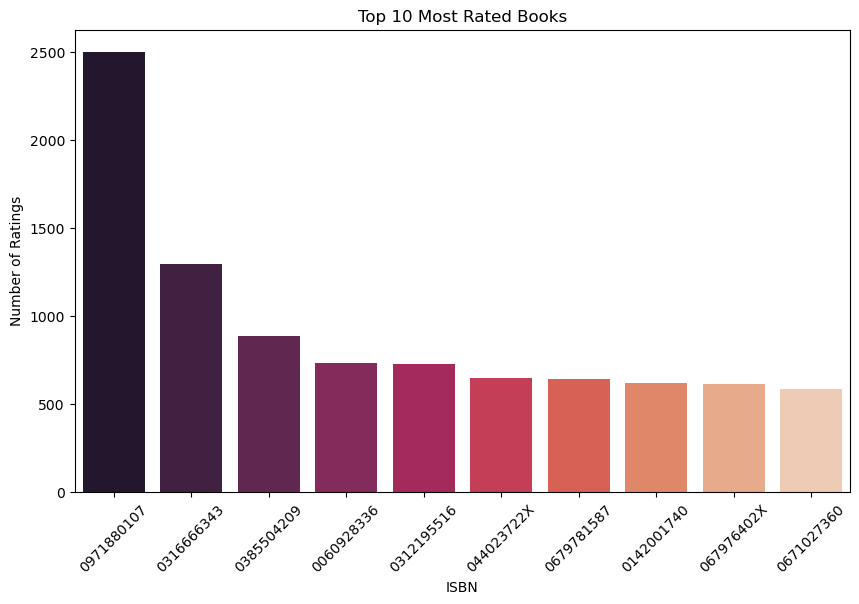

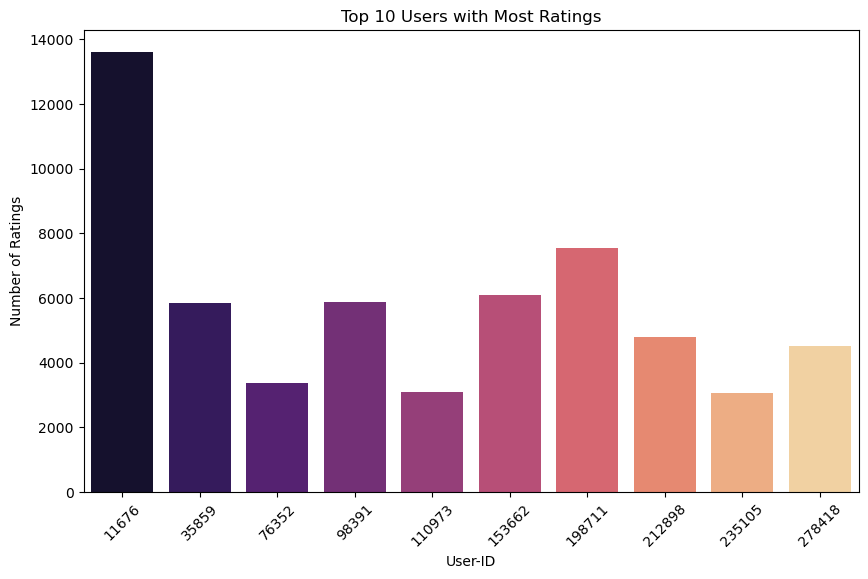

In [ ]:
# Visualization
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(users['Age'], bins=30, kde=True, color='blue')
plt.title("Distribution of User Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Top 10 Publishers
plt.figure(figsize=(10, 6))
top_publishers = books['Publisher'].value_counts().head(10)
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')
plt.title("Top 10 Publishers")
plt.xlabel("Count")
plt.ylabel("Publisher")
plt.show()

# Distribution of Book Ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings['Book-Rating'], bins=10, kde=False, color='green')
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# # Select only numeric columns for correlation
# numeric_columns = ratings.select_dtypes(include=['number'])
# corr_matrix = numeric_columns.corr()

# # Plot the heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title("Correlation Heatmap")
# plt.show()


# Number of Ratings per Book
top_books = ratings['ISBN'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_books.index, y=top_books.values, palette='rocket')
plt.title("Top 10 Most Rated Books")
plt.xlabel("ISBN")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45)
plt.show()

# Number of Ratings per User
top_users = ratings['User-ID'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_users.index, y=top_users.values, palette='magma')
plt.title("Top 10 Users with Most Ratings")
plt.xlabel("User-ID")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45)
plt.show()


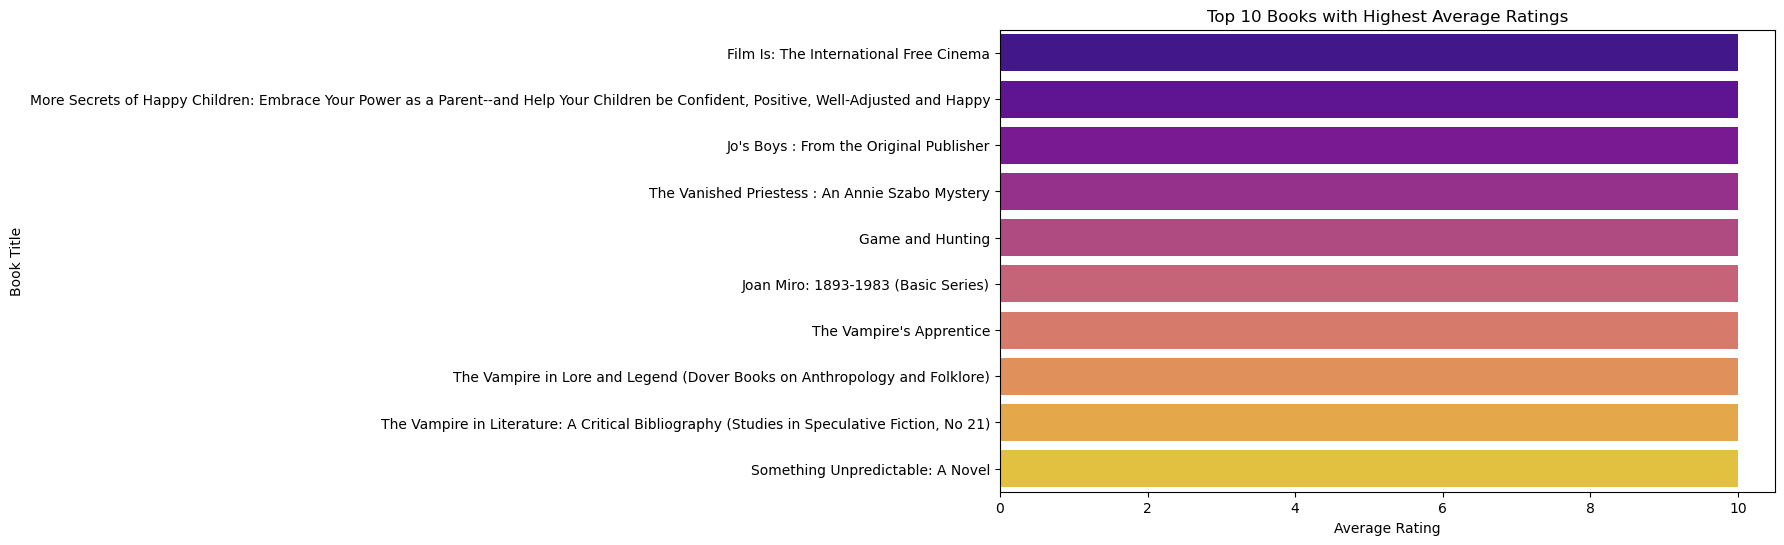

In [ ]:
# Merge datasets for deeper analysis
merged_data = ratings.merge(books, on='ISBN').merge(users, on='User-ID')

# Average Ratings per Book
avg_ratings_per_book = merged_data.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_ratings_per_book.values, y=avg_ratings_per_book.index, palette='plasma')
plt.title("Top 10 Books with Highest Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Book Title")
plt.show()

# # Save cleaned data (optional)
# users.to_csv('cleaned_users.csv', index=False)
# books.to_csv('cleaned_books.csv', index=False)
# ratings.to_csv('cleaned_ratings.csv', index=False)

## POPULARITY BASED RECOMMENDER SYSTEM

In [ ]:
ratings_with_name = ratings.merge(books, on = 'ISBN')
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [ ]:
num_ratings_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_ratings_df.rename(columns={'Book-Rating':'No.of Ratings'},inplace = True)
num_ratings_df

,Book-Title,No.of Ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [ ]:
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].agg(lambda x: x.astype(float).mean()).reset_index()
avg_rating_df.rename(columns = {'Book-Rating' : 'avg_rating'}, inplace = True)
avg_rating_df['avg_rating'] = avg_rating_df['avg_rating'].round(2)
avg_rating_df

In [ ]:
popular_df = num_ratings_df.merge(avg_rating_df,on='Book-Title')
popular_df

NameError: name 'num_ratings_df' is not defined

In [ ]:
popular_df = popular_df[popular_df['No.of Ratings']>=250].sort_values("avg_rating",ascending = False).head(50)

In [ ]:
popular_df=popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','No.of Ratings','avg_rating']]

In [ ]:
popular_df

,Book-Title,Book-Author,Image-URL-M,No.of Ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.85
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.82
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.74
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.50
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.18
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.01
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.95
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.90
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.88
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.70


## COLLABORATIVE-BASED RECOMMENDER SYSTEM

In [ ]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 150
new_users = x[x].index

In [ ]:
filtered_users = ratings_with_name[ratings_with_name['User-ID'].isin(new_users)]
filtered_users

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
14,77480,034545104X,8,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031115,276680,0812881311,0,Streets of Gold,Evan Hunter,1985,Madison Books,http://images.amazon.com/images/P/0812881311.0...,http://images.amazon.com/images/P/0812881311.0...,http://images.amazon.com/images/P/0812881311.0...
1031116,276680,0865055041,0,Kitchen (Historic Communities (Paperback)),Bobbie Kalman,1990,Crabtree Publishing Company,http://images.amazon.com/images/P/0865055041.0...,http://images.amazon.com/images/P/0865055041.0...,http://images.amazon.com/images/P/0865055041.0...
1031117,276680,086505505X,0,Home Crafts (Historic Communities (Paperback)),Bobbie Kalman,1990,Crabtree Publishing Company,http://images.amazon.com/images/P/086505505X.0...,http://images.amazon.com/images/P/086505505X.0...,http://images.amazon.com/images/P/086505505X.0...
1031118,276680,1564407284,0,"The Old Sturbridge Village Cookbook, 2nd : Aut...",Caroline Sloat,1995,Globe Pequot,http://images.amazon.com/images/P/1564407284.0...,http://images.amazon.com/images/P/1564407284.0...,http://images.amazon.com/images/P/1564407284.0...


In [ ]:
y = filtered_users.groupby('Book-Title').count()['Book-Rating'] >= 35
famous_books=y[y].index

In [ ]:
final_ratings = filtered_users[filtered_users['Book-Title'].isin(famous_books)]


In [ ]:
pt = final_ratings.pivot_table(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating')
pt.fillna(0,inplace = True)
pt

User-ID,254,1733,1903,2033,2110,2276,2766,2891,2977,3363,...,274301,274308,274808,275970,276680,277427,277478,277639,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity as cs

In [ ]:
similarity_scores = cs(pt)
similarity_scores

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0454516 ],
       [0.        , 1.        , 0.        , ..., 0.12187492, 0.        ,
        0.07162105],
       [0.        , 0.        , 1.        , ..., 0.09658948, 0.06448266,
        0.03549567],
       ...,
       [0.        , 0.12187492, 0.09658948, ..., 1.        , 0.06439035,
        0.01670749],
       [0.        , 0.        , 0.06448266, ..., 0.06439035, 1.        ,
        0.09936127],
       [0.0454516 , 0.07162105, 0.03549567, ..., 0.01670749, 0.09936127,
        1.        ]])

In [ ]:
def recommend(book_name):
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1], reverse = True)[1:6]
    for i in similar_items:
        print(pt.index[i[0]])
    

In [ ]:
recommend('Never Let Me Go')

IndexError: index 0 is out of bounds for axis 0 with size 0